In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('surat_edaUni.csv')
df.shape

(3233, 12)

In [4]:
df.duplicated().sum()

0

In [5]:
df.bhk = df.bhk.astype('int16')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        2991 non-null   object 
 1   bhk             3233 non-null   int16  
 2   areaType        3233 non-null   object 
 3   square_feet     3233 non-null   int64  
 4   transaction     3219 non-null   object 
 5   status          3233 non-null   object 
 6   floorNum        3032 non-null   float64
 7   totalFloor      3032 non-null   float64
 8   furnishing      3211 non-null   object 
 9   facing          2407 non-null   object 
 10  price_per_sqft  2965 non-null   float64
 11  price           3063 non-null   float64
dtypes: float64(4), int16(1), int64(1), object(6)
memory usage: 284.3+ KB


In [7]:
df.head()

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
0,palanpur,2,Super Area,1311,New Property,Under Construction,NaN,NaN,Unfurnished,NaN,4251.0,0.56
1,palanpur,3,Super Area,1586,New Property,Undefined,NaN,NaN,Unfurnished,NaN,3751.0,0.59
2,palanpur,2,Super Area,1185,New Property,Ready to Move,5.0,14.0,Unfurnished,East,3784.0,0.45
3,dindoli,2,Carpet Area,644,New Property,Under Construction,5.0,10.0,Unfurnished,West,2891.0,0.34
4,palanpur,2,Super Area,1204,New Property,Under Construction,7.0,14.0,Unfurnished,East,3838.0,0.46


In [8]:
df.columns

Index(['location', 'bhk', 'areaType', 'square_feet', 'transaction', 'status',
       'floorNum', 'totalFloor', 'furnishing', 'facing', 'price_per_sqft',
       'price'],
      dtype='object')

# square_feet

C:\Users\HP\AppData\Local\Temp\ipykernel_15252\1803393953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['square_feet'])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


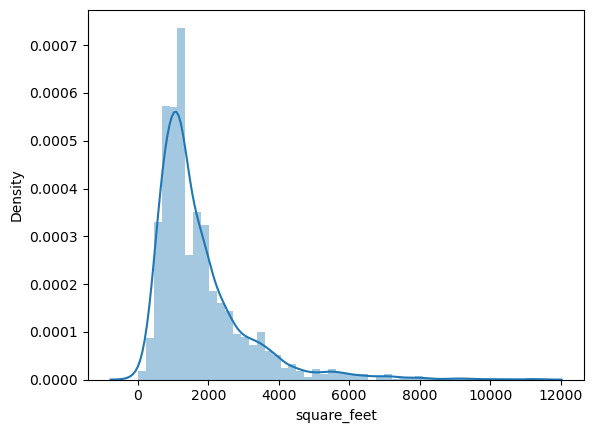

In [9]:
sns.distplot(df['square_feet'])
plt.show()

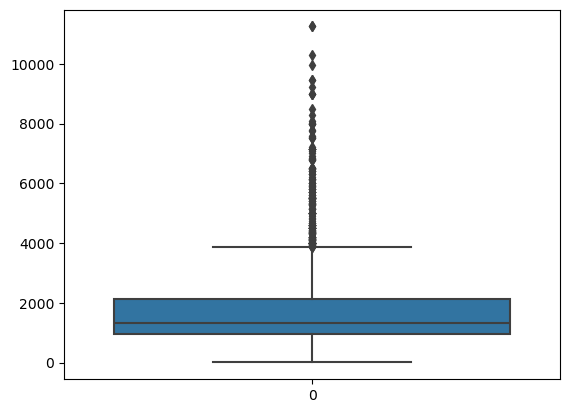

In [10]:
sns.boxplot(df['square_feet'])
plt.show()

In [11]:
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['square_feet'] < lower_bound) | (df['square_feet'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_sqft_stats = outliers['square_feet'].describe()

num_outliers, outliers_sqft_stats

(205,
 count      205.000000
 mean      5478.321951
 std       1515.115955
 min       3882.000000
 25%       4304.000000
 50%       5000.000000
 75%       6140.000000
 max      11250.000000
 Name: square_feet, dtype: float64)

In [12]:
outliers[outliers['bhk'] == 4].sort_values('square_feet',ascending=False).head(20)

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
3188,vesu,4,Super Area,6500,New Property,Under Construction,7.0,11.0,Unfurnished,North - East,7200.0,4.68
3055,athwalines,4,Super Area,6095,New Property,Under Construction,9.0,13.0,Unfurnished,East,9000.0,5.48
3096,vesu,4,Super Area,5800,New Property,Under Construction,6.0,18.0,Unfurnished,East,9517.0,5.52
2881,vesu,4,Super Area,5500,New Property,Under Construction,5.0,12.0,Unfurnished,East,7191.0,3.95
2674,vesu,4,Super Area,5500,New Property,Under Construction,9.0,12.0,Unfurnished,East,7200.0,3.96
3014,athwalines,4,Super Area,5500,New Property,Under Construction,9.0,18.0,Unfurnished,East,8191.0,4.50
3132,vesu,4,Super Area,5500,Resale,Ready to Move,9.0,13.0,Unfurnished,East,6364.0,3.50
3102,vesu,4,Super Area,5500,New Property,Under Construction,6.0,13.0,Unfurnished,East,7200.0,3.96
2828,vesu,4,Super Area,5460,Resale,Ready to Move,2.0,12.0,Unfurnished,South -West,8242.0,4.50
2800,vesu,4,Super Area,5460,Resale,Ready to Move,2.0,11.0,Furnished,South -West,8242.0,4.50


In [13]:
# on the basis of square_feet col we can say that there are genuine outliers

# price_per_sqft

C:\Users\HP\AppData\Local\Temp\ipykernel_15252\575062949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


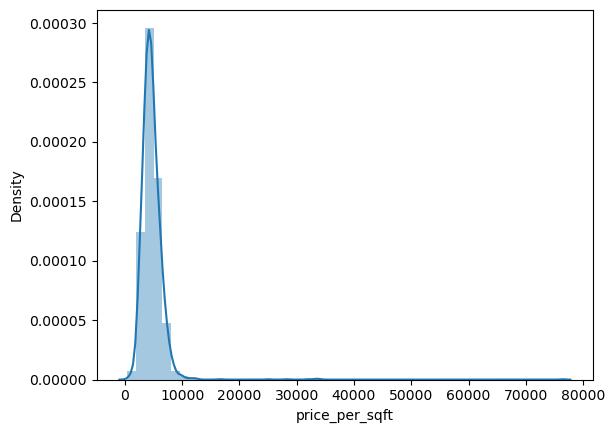

In [14]:
sns.distplot(df['price_per_sqft'])
plt.show()

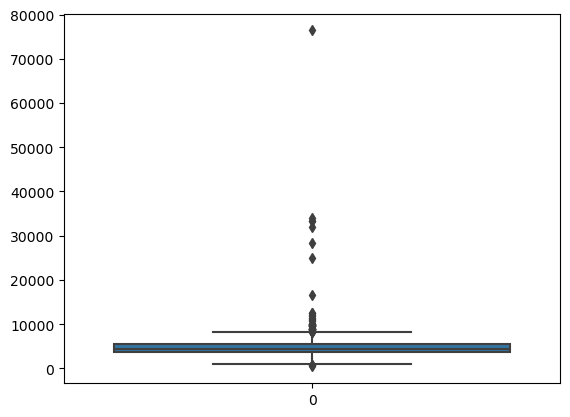

In [15]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [16]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_per_sqft_stats = outliers['price_per_sqft'].describe()

num_outliers, outliers_price_per_sqft_stats

(57,
 count       57.000000
 mean     12575.333333
 std      11273.501231
 min        441.000000
 25%       8500.000000
 50%       9500.000000
 75%      10909.000000
 max      76389.000000
 Name: price_per_sqft, dtype: float64)

In [17]:
df.shape

(3233, 12)

In [18]:
outliers.sort_values('price_per_sqft',ascending=False)

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
261,NaN,2,Carpet Area,12,Resale,Ready to Move,0.0,2.0,Furnished,South,76389.0,0.28
2734,palanpur,2,Carpet Area,750,New Property,Under Construction,3.0,14.0,Unfurnished,East,33977.0,4.40
392,punagam,1,Carpet Area,12,Resale,Undefined,3.0,3.0,Unfurnished,NaN,33333.0,0.05
2698,nanpura/gopipura/chauta/sagrampura,1,Super Area,750,New Property,Ready to Move,2.0,5.0,Semi-Furnished,North,33333.0,2.50
2699,NaN,3,Carpet Area,1100,Resale,Ready to Move,12.0,13.0,Semi-Furnished,NaN,32000.0,4.00
671,adajan,2,Carpet Area,650,Resale,Ready to Move,4.0,4.0,Semi-Furnished,NaN,28242.0,0.17
624,udhna,1,Carpet Area,34,Resale,Ready to Move,0.0,7.0,Unfurnished,NaN,25000.0,0.09
289,nanpura/gopipura/chauta/sagrampura,1,Carpet Area,90,Resale,Ready to Move,1.0,1.0,Unfurnished,East,16667.0,0.15
1537,dumas road/hazira,3,Super Area,1200,Resale,Ready to Move,NaN,NaN,Unfurnished,NaN,12500.0,1.50
2682,dumas road/hazira,5,Super Area,11250,New Property,Under Construction,4.0,18.0,Unfurnished,East,12444.0,14.00


In [19]:
df = df[~(df['price_per_sqft']>=30000)]

In [20]:
df.shape

(3228, 12)

C:\Users\HP\AppData\Local\Temp\ipykernel_15252\575062949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


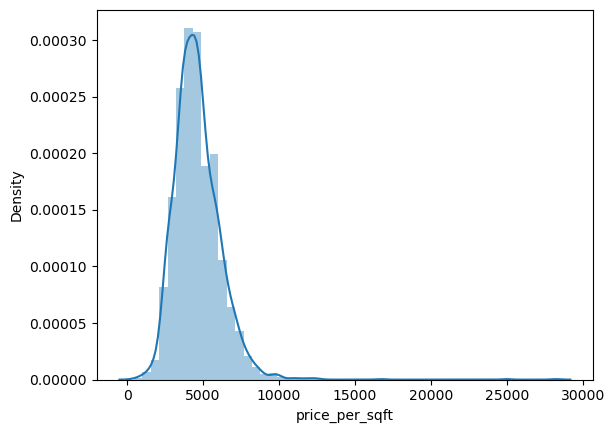

In [21]:
sns.distplot(df['price_per_sqft'])
plt.show()

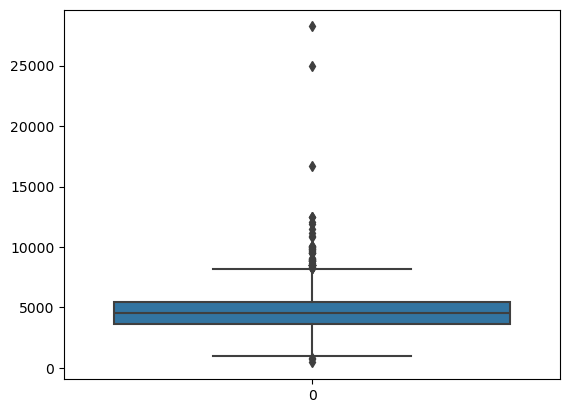

In [22]:
sns.boxplot(df['price_per_sqft'])
plt.show()

# price

C:\Users\HP\AppData\Local\Temp\ipykernel_15252\580929635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


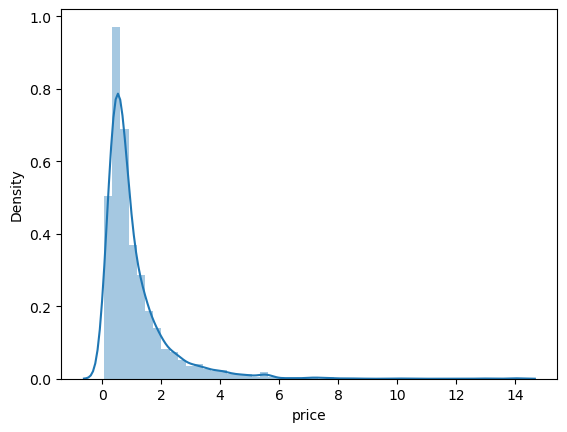

In [23]:
sns.distplot(df['price'])
plt.show()

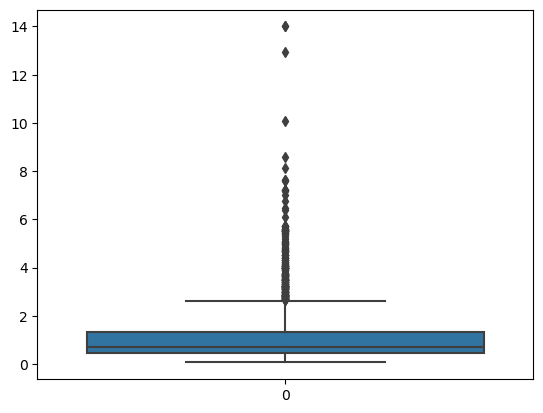

In [24]:
sns.boxplot(df['price'])
plt.show()

In [25]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(230,
 count    230.000000
 mean       4.121217
 std        1.668907
 min        2.660000
 25%        3.102500
 50%        3.615000
 75%        4.650000
 max       14.000000
 Name: price, dtype: float64)

In [26]:
outliers[outliers['bhk'] == 4].sort_values('price',ascending=False)

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
3096,vesu,4,Super Area,5800,New Property,Under Construction,6.0,18.0,Unfurnished,East,9517.0,5.52
3055,athwalines,4,Super Area,6095,New Property,Under Construction,9.0,13.0,Unfurnished,East,9000.0,5.48
3188,vesu,4,Super Area,6500,New Property,Under Construction,7.0,11.0,Unfurnished,North - East,7200.0,4.68
3220,dumas road/hazira,4,Carpet Area,3135,New Property,Ready to Move,5.0,11.0,Unfurnished,North - East,8200.0,4.67
2800,vesu,4,Super Area,5460,Resale,Ready to Move,2.0,11.0,Furnished,South -West,8242.0,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,vesu,4,Super Area,4500,New Property,Ready to Move,7.0,13.0,Unfurnished,East,6000.0,2.70
2959,vesu,4,Super Area,4100,New Property,Ready to Move,5.0,14.0,Unfurnished,West,6600.0,2.70
2793,vesu,4,Super Area,4600,New Property,Under Construction,NaN,NaN,Unfurnished,NaN,5850.0,2.69
2971,vesu,4,Carpet Area,3111,New Property,Under Construction,NaN,NaN,Unfurnished,East,6400.0,2.68


In [27]:
x = df[df['price_per_sqft'] < 2000]

(x['square_feet']/x['bhk']).quantile(0.05)

355.0

In [28]:
df[df['square_feet']/df['bhk'] < 355]

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
3,dindoli,2,Carpet Area,644,New Property,Under Construction,5.0,10.0,Unfurnished,West,2891.0,0.34
5,palanpur,2,Carpet Area,697,New Property,Under Construction,6.0,14.0,Unfurnished,East,4291.0,0.55
8,palanpur,3,Carpet Area,900,New Property,Under Construction,3.0,14.0,Unfurnished,East,3450.0,0.56
24,palanpur,2,Carpet Area,700,New Property,Ready to Move,NaN,NaN,Unfurnished,East,4300.0,0.52
34,palanpur,2,Carpet Area,665,Resale,Under Construction,4.0,13.0,Unfurnished,South -West,4257.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,althan,3,Carpet Area,1020,Resale,Ready to Move,8.0,14.0,Unfurnished,North - East,4526.0,0.84
2637,althan,3,Carpet Area,1050,Resale,Ready to Move,8.0,13.0,Unfurnished,North - East,4909.0,0.94
2643,vesu,3,Carpet Area,1002,Resale,Ready to Move,3.0,12.0,Unfurnished,North - East,4790.0,0.80
2649,vesu,3,Carpet Area,1062,Resale,Ready to Move,7.0,13.0,Unfurnished,North - East,5082.0,0.90


In [29]:
df[df['bhk'] > 6]

,location,bhk,areaType,square_feet,transaction,status,floorNum,totalFloor,furnishing,facing,price_per_sqft,price
1572,amroli,8,Super Area,2800,Resale,Ready to Move,1.0,2.0,Semi-Furnished,NaN,3036.0,0.85
3142,vesu,7,Carpet Area,4675,New Property,Under Construction,12.0,12.0,Unfurnished,East,8500.0,7.22


In [30]:
df.shape

(3228, 12)

# Built-up Area

In [33]:
def calculate_built_up_area(row):
    if row['areaType'] == 'Carpet Area':
        # Increase the carpet area by 10-20% to estimate the built-up area
        return round(row['square_feet'] * 1.1 ) # or use 1.2 for 20% increase
    elif row['areaType'] == 'Super Area':
        # Use the Super Area as it is for built-up area
        return row['square_feet']  # Super Area is usually close to Built-up Area
    else:
        return row['square_feet']  # Fallback to area if type is unknown

# Apply the function to create a new column
df['built_up_area'] = df.apply(calculate_built_up_area, axis=1)

In [34]:
df.shape

(3228, 13)

In [35]:
df.to_csv('surat_outlier.csv', index=False)